# Data science project - HIT - Nisan Cohen Burayev

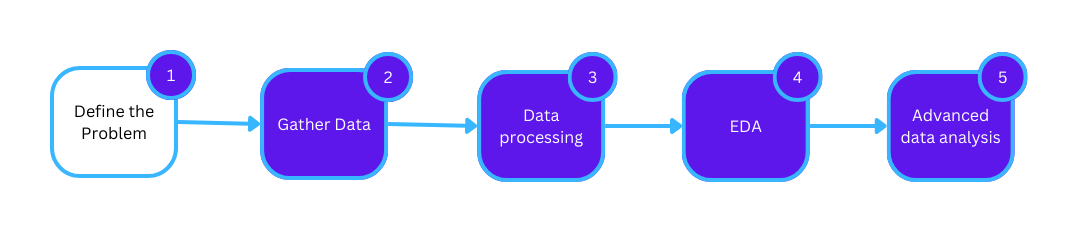

# Estimated bus arrival time 

The objective of this project is to develop a robust model for estimating bus arrival times in Israel. <br> The goal is to improve the accuracy of the existing arrival time predictions and identify factors that contribute to delays.<br>The scope of the project will cover the major bus routes in the country during peak hours.

# Library Import
 

In [412]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

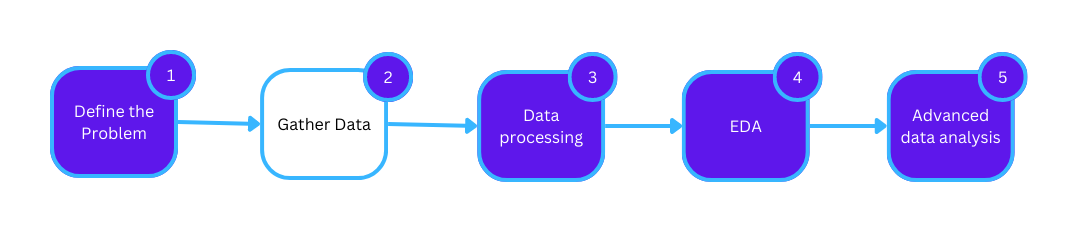


# Load dataset

To build our estimation model, we will collect data from data.gov.il website.<br>
We will obtain historical bus schedules, including departure and arrival times.<br>
With selenium tool we scraped the data, and save it i dataset.csv file.


About the dataset:<br>
columns explanation:<br>
- route_id - bus line identifier (nominal variable)
- month - month number in year 1...12 (ordinal variable)
- day_of_week - day number in week 1...7 (ordinal variable)
- hour_source_ime - start time of the bus ride 
- stop_sequence - the sequence number of the stop (ordinal variable)
- stop_code - stop identifier number (nominal variable)
- arrival_time - ride time from the first stop  in minutes
- distance_from_src - ride distance from the first stop in meters units


In [413]:
dataset = pd.read_csv('dataset.csv')

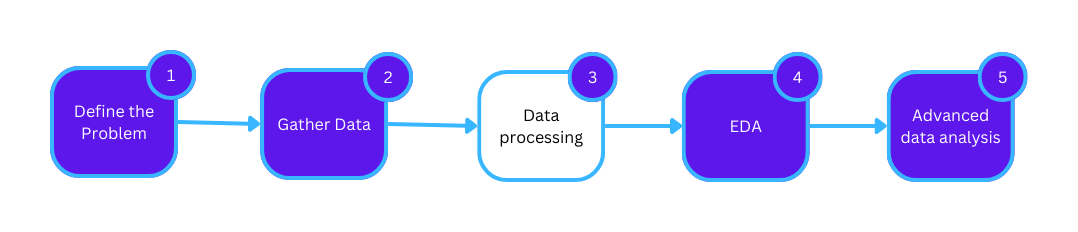

# Data Cleaning and Preprocessing

In this step, we will process the collected data to ensure its quality and prepare it for analysis.<br>
We will clean the datasets, removing any duplicate or irrelevant entries.<br>
Missing values in the data will be addressed using appropriate imputation techniques.<br>

In this step we will prepare the data for next steps<br>
- clean the collected data by addressing missing values
- handle outliers
- normaliz values 
- handling categorical variables

In [414]:
dataset

route_id  month  day_of_week  hour_source_time  stop_sequence  \
0          9847      1            1                 5              1   
1          9847      1            1                 5              2   
2          9847      1            1                 5              3   
3          9847      1            1                 5              4   
4          9847      1            1                 5              5   
...         ...    ...          ...               ...            ...   
12175      9847      3            5                22             40   
12176      9847      3            5                22             41   
12177      9847      3            5                22             42   
12178      9847      3            5                22             43   
12179      9847      3            5                22             44   

       stop_code  distance_from_src  arrival_time  
0          37413                  0          0.32  
1          31685                492          0.72  
2          39938                706          1.14  
3          34905               1038          1.68  
4          31446               1281          2.13  
...          ...                ...           ...  
12175      21617              18180         55.21  
12176      21479              18939         57.05  
12177      20611              19631         59.04  
12178      26656              20356         60.79  
12179      22951              20509         59.62  

[12180 rows x 8 columns]

In [415]:
dataset.describe(include='all')

route_id         month   day_of_week  hour_source_time  stop_sequence  \
count   12180.0  12180.000000  12180.000000      12180.000000   12180.000000   
mean     9847.0      1.978654      3.293596         12.713300      22.496388   
std         0.0      0.819263      1.653995          4.975767      12.702295   
min      9847.0      1.000000      1.000000          5.000000       1.000000   
25%      9847.0      1.000000      2.000000          9.000000      11.000000   
50%      9847.0      2.000000      3.000000         12.000000      22.000000   
75%      9847.0      3.000000      5.000000         17.000000      34.000000   
max      9847.0      3.000000      7.000000         22.000000      44.000000   

          stop_code  distance_from_src  arrival_time  
count  12180.000000       12180.000000  12180.000000  
mean   29658.253530        9480.388752     39.356219  
std     6354.082529        6467.939935     26.861489  
min    20004.000000           0.000000      0.300000  
25%    23017.000000        3627.000000     15.750000  
50%    31461.000000        7480.000000     36.270000  
75%    35855.000000       15219.000000     60.770000  
max    39938.000000       21174.000000    112.590000

#### Missing values

In [416]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   route_id           12180 non-null  int64  
 1   month              12180 non-null  int64  
 2   day_of_week        12180 non-null  int64  
 3   hour_source_time   12180 non-null  int64  
 4   stop_sequence      12180 non-null  int64  
 5   stop_code          12180 non-null  int64  
 6   distance_from_src  12180 non-null  int64  
 7   arrival_time       12180 non-null  float64
dtypes: float64(1), int64(7)
memory usage: 761.4 KB


There are no missing values <br>


####  Check duplicated rows

In [417]:
dataset.duplicated().sum()

0

There are no duplicated rows

In [418]:
dataset['hour_source_time'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22], dtype=int64)

In [419]:
dataset['stop_sequence'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype=int64)

In this bus route there are 44 stops

#### Outliers

After looking at the data we decided to stay with all the outliers values and treat them as normal values.

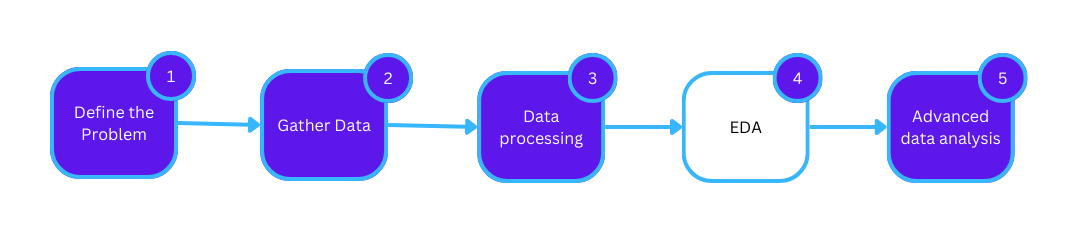

# Exploratory Data Analysis (EDA)

EDA will help us gain insights into the characteristics of the data and identify patterns or relationships that can inform our modeling process.<br> We will calculate summary statistics, such as mean and standard deviation, for key variables such as bus arrival times.<br>
Visualizations, such as scatter plots or histograms, will be created to understand the distribution of data.<br>
We will analyze correlations between variables to identify potential factors affecting bus arrival times, such as day of week or route source time. EDA will provide a foundation for making informed decisions during the modeling phase.

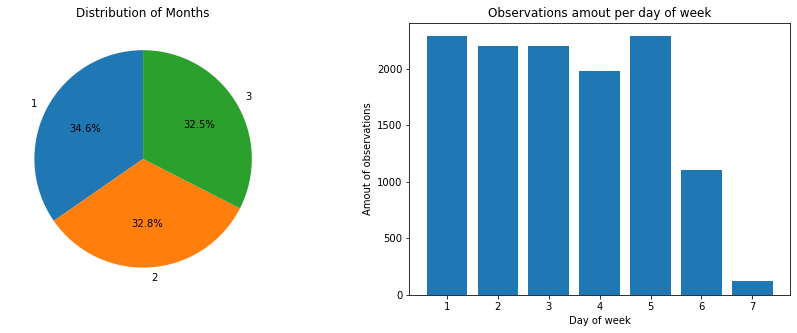

In [420]:
counts_month = dataset['month'].value_counts()
counts_day_of_week = dataset['day_of_week'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.pie(counts_month, labels=counts_month.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribution of Months')

ax2.bar(counts_day_of_week.index,counts_day_of_week)
ax2.set_xlabel('Day of week')
ax2.set_ylabel('Amout of observations')
ax2.set_title('Observations amout per day of week')

plt.show()


In [421]:
# calculate avg distance and arrival time for each stop from the source
stops = dataset['stop_sequence'].unique()

avg_distance_ls = []
avg_arrival_time_ls = []
for stop in stops:
    avg_distance = dataset[dataset['stop_sequence']==stop]['distance_from_src'].mean()
    avg_arrival_time = dataset[dataset['stop_sequence']==stop]['arrival_time'].mean()
    avg_distance_ls.append(avg_distance)
    avg_arrival_time_ls.append(avg_arrival_time)
    
df = pd.DataFrame({'avg_distance':avg_distance_ls, 'avg_arrival_time': avg_arrival_time_ls }, index=stops)
    

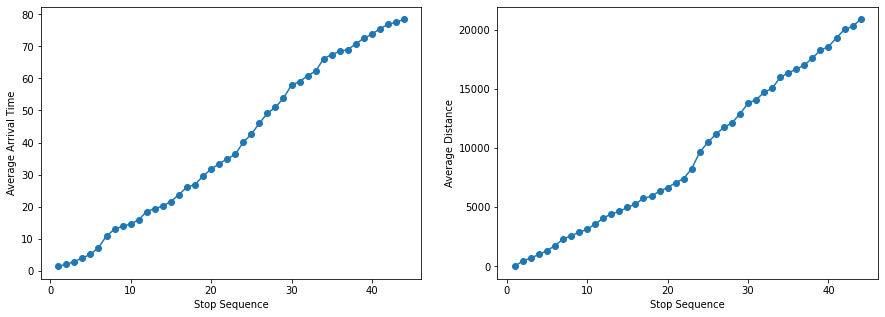

In [422]:
# Create the line plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(stops, df['avg_arrival_time'], marker='o')
ax1.set_xlabel('Stop Sequence')
ax1.set_ylabel('Average Arrival Time')

ax2.plot(stops, df['avg_distance'], marker='o')
ax2.set_xlabel('Stop Sequence')
ax2.set_ylabel('Average Distance')


plt.show()

In [423]:
df = pd.DataFrame()
df['is_arrival_time_above_avg'] = dataset.apply(lambda row:  row['arrival_time']> avg_arrival_time_ls[int(row['stop_sequence'])-1] , axis=1)


Text(0, 0.5, 'Relative frequency')

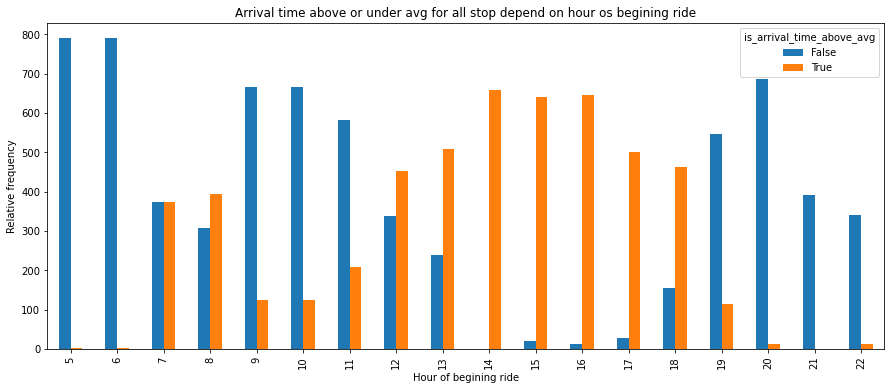

In [424]:
ct = pd.crosstab(dataset['hour_source_time'],df['is_arrival_time_above_avg'])
ct.plot(kind='bar', figsize=(15,6))
plt.title('Arrival time above or under avg for all stop depend on hour os begining ride')
plt.xlabel('Hour of begining ride')
plt.ylabel('Relative frequency')

In [425]:
last_stop_number = dataset['stop_sequence'].unique().max()
print(last_stop_number)

44


In [557]:
# day_1_mean = dataset[dataset['day_of_week'] == 1 ][''].mean()
day_1_mean_arrival_time = dataset[(dataset['day_of_week'] == 1) & (dataset['stop_sequence'] == last_stop_number) ]['arrival_time'].mean()
day_2_mean_arrival_time = dataset[(dataset['day_of_week'] == 2) & (dataset['stop_sequence'] == last_stop_number) ]['arrival_time'].mean()
day_3_mean_arrival_time = dataset[(dataset['day_of_week'] == 3) & (dataset['stop_sequence'] == last_stop_number) ]['arrival_time'].mean()
day_4_mean_arrival_time = dataset[(dataset['day_of_week'] == 4) & (dataset['stop_sequence'] == last_stop_number) ]['arrival_time'].mean()
day_5_mean_arrival_time = dataset[(dataset['day_of_week'] == 5) & (dataset['stop_sequence'] == last_stop_number) ]['arrival_time'].mean()
day_6_mean_arrival_time = dataset[(dataset['day_of_week'] == 6) & (dataset['stop_sequence'] == last_stop_number) ]['arrival_time'].mean()
day_7_mean_arrival_time = dataset[(dataset['day_of_week'] == 7) & (dataset['stop_sequence'] == last_stop_number) ]['arrival_time'].mean()



In [558]:
days_of_week = dataset['day_of_week'].unique()
dic = {
    'day_of_week' : days_of_week,
    'mean_arrival_time': [day_1_mean_arrival_time,day_2_mean_arrival_time,day_3_mean_arrival_time,day_4_mean_arrival_time,day_5_mean_arrival_time,day_6_mean_arrival_time,day_7_mean_arrival_time]
}
# print(day_1_mean_arrival_time)
# print(day_2_mean_arrival_time)
# print(day_3_mean_arrival_time)
# print(day_4_mean_arrival_time)
# print(day_5_mean_arrival_time)
# print(day_6_mean_arrival_time)
# print(day_7_mean_arrival_time)
new_df = pd.DataFrame(dic, index=None)
new_df

day_of_week  mean_arrival_time
0            1          77.544038
1            2          80.079400
2            3          79.121400
3            4          80.699556
4            5          79.128846
5            6          73.026400
6            7          54.950000

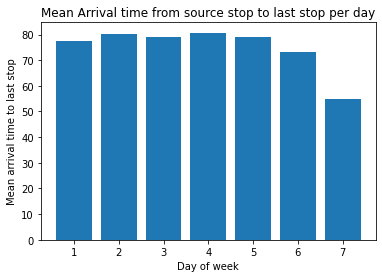

In [559]:
plt.bar(new_df['day_of_week'], new_df['mean_arrival_time'])

plt.xlabel("Day of week")
plt.ylabel("Mean arrival time to last stop")
plt.title("Mean Arrival time from source stop to last stop per day")

plt.show()

# Feature engenering 

In [560]:
def remove_cols(dataset, cols_to_remove):
    df = dataset.copy()
    df = df.drop(cols_to_remove, axis=1)
    return df

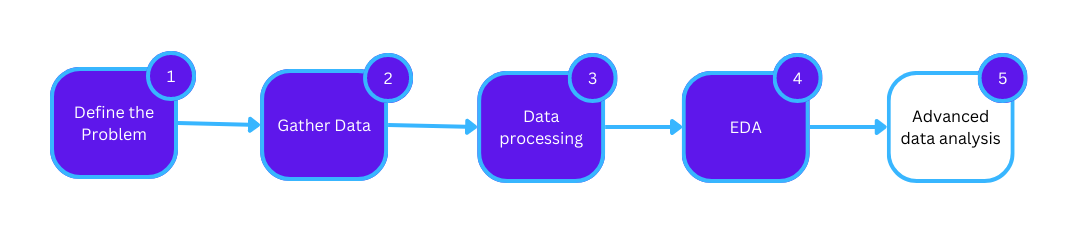

# Model Selection and Training

In this final step, we will leverage advanced data analysis techniques to develop our bus arrival time estimation model.<br>
We will explore various approaches such as regression and SVR models.<br>
The models will be trained using a combination of historical bus data.<br>
We will evaluate the performance of our models using appropriate metrics, such as mean squared error. <br>
We will use train_test_split method for validation.

In [815]:
def scale_dataset(dataset):
    # Min-max normalization
    scaler = MinMaxScaler()
    dataset_scaled = scaler.fit_transform(dataset)
#     return dataset.copy()
    return pd.DataFrame(dataset_scaled, columns=dataset.columns)

In [816]:
def train_test_split_data(dataset, target_col):
    df = remove_cols(dataset,['stop_sequence'])
    scl_dataset = scale_dataset(df)
    y = scl_dataset.pop(target_col)
    X = scl_dataset.iloc[:,:]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=41)
    
    return X_train, X_test, y_train, y_test

        

In [817]:
X_train, X_test, y_train, y_test = train_test_split_data(dataset, 'arrival_time')

In [818]:
def create_model(model_name):
    if model_name.lower() == 'regression':
        return LinearRegression()
    elif model_name.lower() == 'svr':
        return SVR()
    else:
        raise ValueError('Invalid model name. Please choose "regression" or "svr".')

### Linear regression

In [819]:
regression_model = create_model('regression')


In [820]:
regression_model.fit(X_train, y_train)
# let's look inside the model
print("b1:",model.coef_)
print("b0:",model.intercept_)

b1: [ 0.          0.03096787 -0.00456192  0.05365063  0.7354215  -0.02305263]
b0: -0.04598829659692827


In [821]:
y_pred = regression_model.predict(X_test)

In [822]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

        Actual  Predicted
7360  0.354261   0.221939
6768  0.780657   0.698359
6242  0.703268   0.727059
8012  0.105263   0.144383
8144  0.109271   0.203376
...        ...        ...
5139  0.670941   0.649932
2665  0.512779   0.394857
1216  0.395583   0.431323
4992  0.278297   0.348328
7348  0.097426   0.081197

[2436 rows x 2 columns]


### Linear regression - model evaluation

In [823]:
r2_score(y_test,y_pred)

0.8705014405120681

### SVR

In [824]:
svr_model = create_model('svr')
svr_model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)



#### SVR - model evaluation

In [825]:
score = r2_score(y_test,y_pred)
print(score)

0.922152244142422


# Conclusion

 - We managed to reach models with accuracy percentages of more than 80%. <br>
 And this is because the data we have collected is quite accurate and organized by the Ministry of Transportation
 - The model is only suitable for round hours, because the observations were conducted on bus lines that left the departure station on round hours.<br>
 - As expected, the hours when travel times are longer than average are in the morning and afternoon.
 